GATHER DATA

In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Read and view vgsales data

df = pd.read_csv('../data/vgsales.csv')

ASSESS DATA

In [12]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
# Describe shape 

df.shape

(16598, 11)

In [6]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [9]:
# Sort years in the data

sorted(list(df.Year.unique()))

[1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 nan,
 2016.0,
 2017.0,
 2020.0]

In [10]:
df.Genre.value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

CLEAN DATA

In [13]:
df_copy = df.copy()

In [15]:
# Delete data without year and publisher

df_copy.dropna(axis=0, how='any', inplace=True)

In [22]:
df_copy['Global_Sales'] = df_copy['NA_Sales'] + df_copy['EU_Sales'] + df_copy['JP_Sales']+df_copy['Other_Sales']

STORE CLEANED CSV AND RELOAD TO ANALYZE

In [40]:
df_copy.reset_index(drop=True)
df_copy.to_csv('../data/clean_vgsales.csv', index=False)

In [27]:
clean_df = pd.read_csv('../data/clean_vgsales.csv')

In [35]:
# Find top 5 genres

clean_df.groupby('Genre')['Global_Sales'].mean().sort_values()

Genre
Adventure       0.187558
Strategy        0.265721
Puzzle          0.441418
Simulation      0.475684
Misc            0.483500
Action          0.534082
Fighting        0.537800
Sports          0.574259
Racing          0.600978
Role-Playing    0.641563
Shooter         0.819281
Platform        0.963213
Name: Global_Sales, dtype: float64

Text(0, 0.5, 'Average Sales Number (millions)')

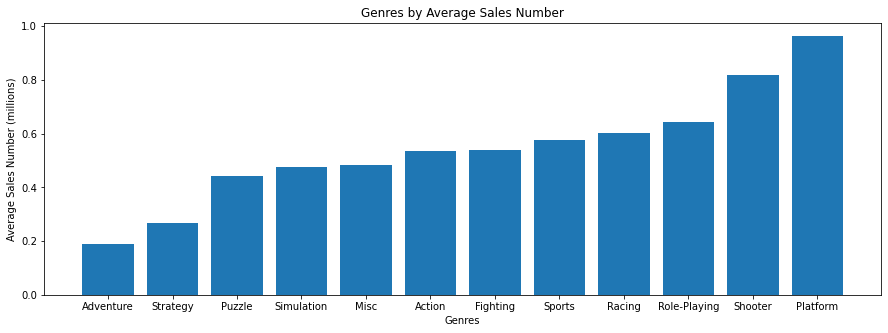

In [37]:
plt.figure(figsize=(15,5))
plt.bar(range(0,12), list(clean_df.groupby('Genre')['Global_Sales'].mean().sort_values().values), tick_label=list(clean_df.groupby('Genre')['Global_Sales'].mean().sort_values().index))
plt.title('Genres by Average Sales Number')
plt.xlabel('Genres')
plt.ylabel('Average Sales (millions)')

In [41]:
# Find top 5 platforms

clean_df.groupby('Platform')['Global_Sales'].mean().sort_values()

Platform
TG16    0.020000
GG      0.040000
3DO     0.060000
NG      0.129091
PSV     0.154658
SAT     0.204416
WS      0.236667
PSP     0.248811
PC      0.277847
SCD     0.310000
XB      0.317224
DC      0.317400
GC      0.364249
GBA     0.391682
DS      0.391798
3DS     0.505528
WiiU    0.575211
PS2     0.592443
PS      0.632431
XOne    0.687304
N64     0.702370
Wii     0.710563
PS3     0.734143
2600    0.784100
X360    0.792666
PS4     0.860881
SNES    0.921925
GEN     0.978750
NES     2.594737
GB      2.673579
Name: Global_Sales, dtype: float64

Text(0, 0.5, 'Average Sales (millions)')

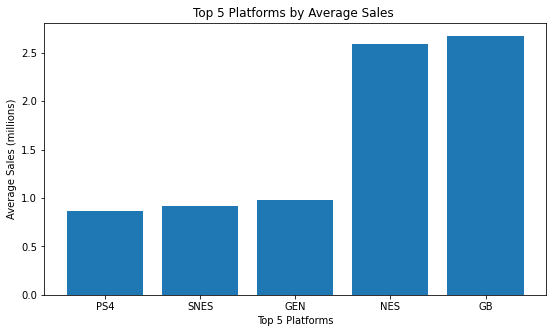

In [39]:
plt.figure(figsize=(9,5))
plt.bar([1, 2, 3,4,5], [0.8608805, 0.92192488, 0.97875, 2.59473684, 2.67357895], tick_label=['PS4', 'SNES', 'GEN', 'NES', 'GB'])
plt.title('Top 5 Platforms by Average Sales ')
plt.xlabel('Top 5 Platforms')
plt.ylabel('Average Sales (millions)')